In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath('../app'))

import importlib.util

spec = importlib.util.spec_from_file_location("mainapp", "../app/mainapp.py")
mainapp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mainapp)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [7]:
print("Hole Flugdaten...")

raw_data = mainapp.fetch_flight_data("ZRH", "BCN")  # <-- Erst Flugdaten holen
print("Rohdaten:")
print(raw_data)

df = mainapp.prepare_dataframe(raw_data)            # <-- Dann DataFrame erstellen
print("Erste Zeilen der Daten:")
print(df.head())                                    # <-- Erst jetzt df.head() aufrufen

Hole Flugdaten...
Status Code: 200
Antworttext: {"currency":"eur","error":"","data":[{"depart_date":"2025-05-12","origin":"ZRH","destination":"BCN","gate":"Kupi.com","return_date":"2025-05-18","found_at":"2025-04-29T14:08:50","trip_class":0,"value":94,"number_of_changes":0,"duration":220,"distance":855,"show_to_affiliates":true,"actual":true},{"d
Rohdaten:
[{'depart_date': '2025-05-12', 'origin': 'ZRH', 'destination': 'BCN', 'gate': 'Kupi.com', 'return_date': '2025-05-18', 'found_at': '2025-04-29T14:08:50', 'trip_class': 0, 'value': 94, 'number_of_changes': 0, 'duration': 220, 'distance': 855, 'show_to_affiliates': True, 'actual': True}, {'depart_date': '2025-09-10', 'origin': 'ZRH', 'destination': 'BCN', 'gate': 'Trip.com', 'return_date': '2025-09-14', 'found_at': '2025-04-29T15:11:31', 'trip_class': 0, 'value': 101, 'number_of_changes': 0, 'duration': 225, 'distance': 855, 'show_to_affiliates': True, 'actual': True}, {'depart_date': '2025-09-10', 'origin': 'ZRH', 'destination': 'BCN'

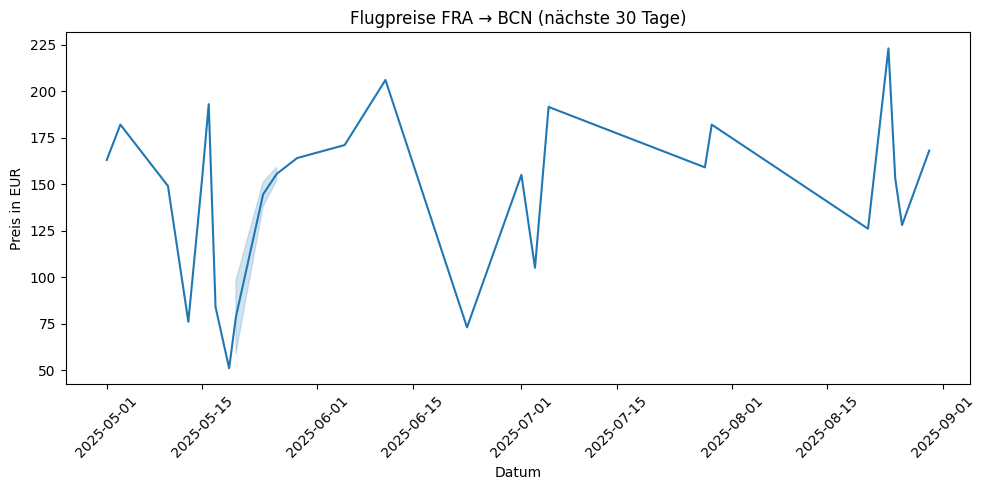

In [4]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="date", y="price", data=df)
plt.title("Flugpreise FRA → BCN (nächste 30 Tage)")
plt.xlabel("Datum")
plt.ylabel("Preis in EUR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
weekday_avg = mainapp.compare_weekday_prices(df)
print("\nDurchschnittliche Preise pro Wochentag:")
print(weekday_avg.sort_values())



Durchschnittliche Preise pro Wochentag:
weekday
Tuesday      111.000000
Monday       124.500000
Thursday     146.833333
Saturday     156.875000
Friday       193.000000
Wednesday    206.000000
Sunday       223.000000
Name: price, dtype: float64


In [6]:
t, p = mainapp.run_statistical_test(df)

print(f"\n📊 t-Test Ergebnis:")
print(f"t-Wert: {t:.2f}")
print(f"p-Wert: {p:.4f}")

if p < 0.05:
    print("✅ Statistisch signifikanter Unterschied zwischen Montag und Freitag")
else:
    print("⚠️ Kein signifikanter Preisunterschied festgestellt")



📊 t-Test Ergebnis:
t-Wert: nan
p-Wert: nan
⚠️ Kein signifikanter Preisunterschied festgestellt
